<a href="https://colab.research.google.com/github/felipemunarol/machine_learning_projects/blob/master/Optimization_Algorithms%20/Otimizacao_GA_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pygad.GA performs the Genetic algorithm - https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html#batch-fitness-calculation
! pip install pygad

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import csv
import pandas as pd
import os
import pygad
import numpy as np
from matplotlib import pyplot
import time
from matplotlib import cm
from scipy.optimize import minimize

pd.set_option('display.max_columns', None)

# Conecta o serviço com o Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Atividade computacional - 4

- 1.Escolher uma das três meta-heurísticas apresentadas nesta aula e uma ferramenta de sua escolha (e.g. niapy).
- 2.Realizar a otimização com a ferramenta/meta-heurística escolhida no problema proposto em [Shi98].
- 3.Justificar a escolha dos parâmetros da meta-heurística, e executar no mínimo 20 vezes para cada caso.
- 4.Elaborar um texto de 1 parágrafo (>50 palavras) que explica os resultados de sua análise, atendendo aos objetivos 3, 4 e 5 desta aula. Não deixe de citar as referências no texto. Usar formato IEEE.
- 5.Colocar o texto e os resultados em uma apresentação de slides ou pdf.
- 6.Apresentar os slides.
- 7.Avaliar @s colegas e se auto-avaliar usando uma rubrica.



# O Problema - Schaffer’ s f6 function

- https://www.sfu.ca/~ssurjano/schaffer2.html - Schaffer function
- 1998Shi_A_modified_particle_swarm_optimizer.pdf - PSO used solve Schaffer

A função Schaffer's f6 é uma função de brenchmark com diversos mínimos locais e um mínimo global situado no ponto (0, 0).

# Função de Benchmark

In [ ]:
# Test Funcions
# https://en.wikipedia.org/wiki/Test_functions_for_optimization
def objective(params, *args):
  x, y = params
  # 1. Primeira funcao, Sphere fucntions for 2 D
  # return x**2.0 + y**2.0
  # 2. Segunda Funcao, Rastring Function
  # A = 10
  # return 10*2 + x**2 - A*np.cos(2*np.pi*x) + y**2 - A*np.cos(2*np.pi*y)
  # 3. Terceita funcao, Ackley fucntions for 2 D - Todo
  # def ackley():
  #   f =-20*exp[ -0.2 * (0.5*(x^2+y^2))^-1 − exp [0.5(cos(2*pi*x) + cos(2*pi*y)] + e + 2
  # 4. Quarta funcao, Schaffer's f6 function
  f = 0.5 + ( ( np.sin(np.sqrt(x**2 + y**2))**2 - 0.5) / ( 1 + 0.001*(x**2 + y**2) )**2 )
  return f

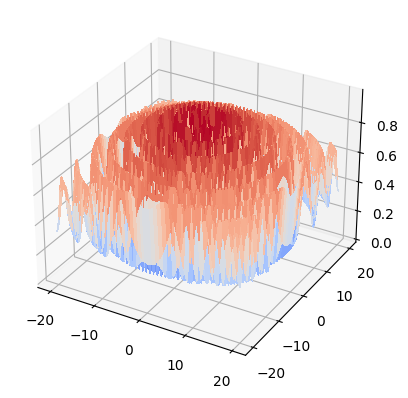

In [ ]:
# Definicao do Espaço de Otimizacao e Plot da Funcao superficie - 3D
rmin, rmax = -20, 20

xaxis, yaxis = np.arange(rmin, rmax, 0.1), np.arange(rmin, rmax, 0.1)
x, y = np.meshgrid(xaxis, yaxis)

# Aplicacao da funcao objetivo
results = objective((x, y))

# Plot do resultado - 2d
# pyplot.contour(x, y, results, 50, alpha=1.0, cmap=cm.coolwarm)
# Plot do resultado - 3d
fig, ax = pyplot.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x, y, results, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
pyplot.show()


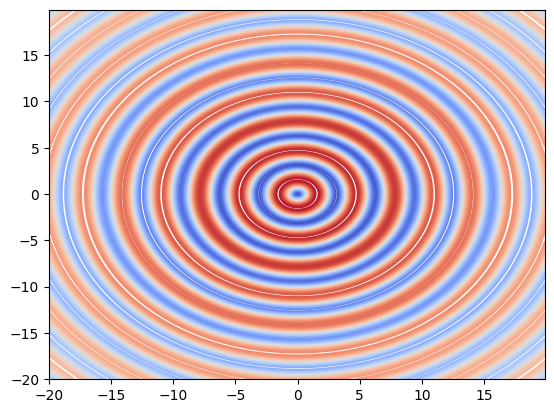

In [ ]:
# Plot do resultado - 2d
pyplot.contour(x, y, results, 50, alpha=1.0, cmap=cm.coolwarm)

# Otimizacao - Testes


### Algoritmo Genético

According to Mitchell (1999), “In the 1950s and the 1960s several computer
scientists independently studied evolutionary systems with the idea that evolution could be used as an optimization tool for engineering problems. The idea was to evolve a population of candidate solutions to a given problem, using operators inspired by natural genetic variation and natural selection.” All these techniques are collectively referred to as evolutionary computation (EC) techniques [1].

In [ ]:
# https://onlinelibrary-wiley.ez24.periodicos.capes.gov.br/doi/epdf/10.1002/9780470612163.fmatter
# http://journal.iberamia.org/index.php/intartif/article/view/515/137

In [ ]:
def genetic_algorithm():
  return

In [ ]:
desired_output = 0 # Function output.

def fitness_func(ga_instance, solution, sol_idx):
  output = objective(solution)
  fitness = 1.0 / np.abs(output - desired_outputs)
  return fitness


In [ ]:
num_generations = 1000
num_parents_mating = 4
dimension = 2
desired_outputs = 0
fitness_function = fitness_func
sol_per_pop = 8
num_genes = 2
init_range_low = -10
init_range_high = 10
parent_selection_type = "sss" # 'sss' for steady-state selection
# https://en.wikipedia.org/wiki/Selection_(genetic_algorithm)
keep_parents = 0
crossover_type = "single_point"
mutation_type = "random"
mutation_probability = 0.01

In [ ]:
def GA(num_generations, num_parents_mating, fitness_function, sol_per_pop, num_genes, init_range_low, init_range_high, parent_selection_type, keep_parents, crossover_type, mutation_type, mutation_probability):

  best_x_list = []
  best_fitness_list = []
  test = []
  dts = []

  st = time.time()
  for i in range(20):

    print("run round", i)
    et = time.time()

    ga_instance = pygad.GA(num_generations=num_generations,
                        num_parents_mating=num_parents_mating,
                        fitness_func=fitness_function,
                        sol_per_pop=sol_per_pop,
                        num_genes=num_genes,
                        init_range_low=init_range_low,
                        init_range_high=init_range_high,
                        parent_selection_type=parent_selection_type,
                        keep_parents=keep_parents,
                        crossover_type=crossover_type,
                        mutation_type=mutation_type,
                        mutation_probability =mutation_probability,
                        )

    ga_instance.run()

    best_x_list.append(ga_instance.best_solution()[0])
    best_fitness_list.append(ga_instance.best_solution()[1])


    dt = et-st
    dts.append(dt)

  # transform best_x in a array to acess the matrice indices of x and y
  best_x_list = np.array(best_x_list)

  print(

      "media best x", np.mean(best_x_list[:, 0]) , "\n",
      "media best y", np.mean(best_x_list[:, 1]) , "\n",
      "media best fitness", 1/ np.mean(best_fitness_list),
      'Mean Execution time:', dt, 'seconds',
      "desvio best x", np.std(best_x_list[:, 0]) , "\n",
      "desvio best y", np.std(best_x_list[:, 1]) , "\n",
      "desvio best fitness", 1/ np.std(best_fitness_list),
      'Desvio Execution time:', np.mean(dts), 'seconds',
      'Total Execution time:', np.sum(dts), 'seconds'
  )

In [ ]:
# First application of GA

num_generations = 50
num_parents_mating = 4
dimension = 2
desired_outputs = 0
fitness_function = fitness_func
sol_per_pop = 8
num_genes = 2
init_range_low = -10
init_range_high = 10

parent_selection_type = "sss" # 'sss' for steady-state selection
# https://en.wikipedia.org/wiki/Selection_(genetic_algorithm)
keep_parents = 0
crossover_type = "single_point"
mutation_type = "random"
mutation_probability = 0.01

GA(num_generations, num_parents_mating, fitness_function, sol_per_pop, num_genes, init_range_low, init_range_high, parent_selection_type, keep_parents, crossover_type, mutation_type, mutation_probability)

run round 0
run round 1
run round 2
run round 3
run round 4
run round 5
run round 6
run round 7
run round 8
run round 9
run round 10
run round 11
run round 12
run round 13
run round 14
run round 15


/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:808: UserWarning: The steady-state parent (sss) selection operator is used despite that no parents are kept in the next generation.
  if not self.suppress_warnings: warnings.warn("The steady-state parent (sss) selection operator is used despite that no parents are kept in the next generation.")


run round 16
run round 17
run round 18
run round 19
media best x -1.8427357294353732 
 media best y -0.8992432879377994 
 media best fitness 0.04076894623851158 Mean Execution time: 0.2711315155029297 seconds desvio best x 5.353658503062449 
 desvio best y 5.345980301108864 
 desvio best fitness 0.05007949701084821 Desvio Execution time: 0.13345972299575806 seconds Total Execution time: 2.669194459915161 seconds


In [ ]:
# Second application of GA

num_generations = 50
num_parents_mating = 4
dimension = 2

desired_outputs = 0
fitness_function = fitness_func

sol_per_pop = 50
num_genes = 2

init_range_low = -10
init_range_high = 10


parent_selection_type = "sss" # 'sss' for steady-state selection
# https://en.wikipedia.org/wiki/Selection_(genetic_algorithm)
keep_parents = -1

crossover_type = "single_point"

mutation_type = "random"
mutation_probability = 0.01

GA(num_generations, num_parents_mating, fitness_function, sol_per_pop, num_genes, init_range_low, init_range_high, parent_selection_type, keep_parents, crossover_type, mutation_type, mutation_probability)

run round 0
run round 1
run round 2
run round 3
run round 4
run round 5
run round 6
run round 7
run round 8
run round 9
run round 10
run round 11
run round 12
run round 13
run round 14
run round 15
run round 16
run round 17
run round 18
run round 19
media best x 0.03690113779389335 
 media best y -0.21388386249905716 
 media best fitness 0.011780292112668282 Mean Execution time: 3.6527035236358643 seconds desvio best x 2.982368676885822 
 desvio best y 2.611546216254767 
 desvio best fitness 0.03366718159197585 Desvio Execution time: 2.166417384147644 seconds Total Execution time: 43.32834768295288 seconds


In [ ]:
# Third application of GA

num_generations = 100
num_parents_mating = 4
dimension = 2

desired_outputs = 0
fitness_function = fitness_func

sol_per_pop = 50
num_genes = 2

init_range_low = -10
init_range_high = 10


parent_selection_type = "sss" # 'sss' for steady-state selection
# https://en.wikipedia.org/wiki/Selection_(genetic_algorithm)
keep_parents = -1

crossover_type = "single_point"

mutation_type = "random"
mutation_probability = 0.01

GA(num_generations, num_parents_mating, fitness_function, sol_per_pop, num_genes, init_range_low, init_range_high, parent_selection_type, keep_parents, crossover_type, mutation_type, mutation_probability)

run round 0
run round 1
run round 2
run round 3
run round 4
run round 5
run round 6
run round 7
run round 8
run round 9
run round 10
run round 11
run round 12
run round 13
run round 14
run round 15
run round 16
run round 17
run round 18
run round 19
media best x -0.3447977050447488 
 media best y -0.20659678823802965 
 media best fitness 0.010982192759884666 Mean Execution time: 2.4740326404571533 seconds desvio best x 2.8555933945492398 
 desvio best y 2.4424893603890947 
 desvio best fitness 0.03706547237486415 Desvio Execution time: 1.3460112810134888 seconds Total Execution time: 26.920225620269775 seconds


In [ ]:
# Third application of GA

num_generations = 100
num_parents_mating = 4
dimension = 2

desired_outputs = 0
fitness_function = fitness_func

sol_per_pop = 50
num_genes = 2

init_range_low = -10
init_range_high = 10


parent_selection_type = "rws" # 'sss' for roylette wheel selection
# https://en.wikipedia.org/wiki/Selection_(genetic_algorithm)
keep_parents = -1

crossover_type = "single_point"

mutation_type = "random"
mutation_probability = 0.01

GA(num_generations, num_parents_mating, fitness_function, sol_per_pop, num_genes, init_range_low, init_range_high, parent_selection_type, keep_parents, crossover_type, mutation_type, mutation_probability)

run round 0
run round 1
run round 2
run round 3
run round 4
run round 5
run round 6
run round 7
run round 8
run round 9
run round 10
run round 11
run round 12
run round 13
run round 14
run round 15
run round 16
run round 17
run round 18
run round 19
media best x 0.7044909408059534 
 media best y -1.19731607554097 
 media best fitness 0.011600350484669623 Mean Execution time: 3.26479434967041 seconds desvio best x 2.904303063455388 
 desvio best y 2.3262440390975283 
 desvio best fitness 0.03323584126033994 Desvio Execution time: 1.6216365098953247 seconds Total Execution time: 32.432730197906494 seconds


In [ ]:
# Referencias Bibliograficas

# [1] A review on genetic algorithm: past, present, and future - Sourabh Katoch1 & Sumit Singh Chauhan1 & Vijay Kumar - Artigo Review sobre GA (principal artigo)
# [2] https://www.sciencedirect.com/sdfe/pdf/download/eid/3-s2.0-B9780123982964000039/first-page-pdf
# [3] A review on genetic algorithm - Sourabh Katoch1 & Sumit Singh Chauhan1 & Vijay Kumar
# [4] 1998Shi_A_modified_particle_swarm_optimizer%20(2).pdf
# [5] A Novel Adaptive PSO Algorithm on Schaffer’s F6 Functio, Xiaohong Qiu, Jun Liu
# [6] https://www.researchgate.net/publication/259461147_Selection_Methods_for_Genetic_Algorithms - Selection Methods for Genetic Algorithms
# [7] https://www.scirp.org/pdf/AM20123000039_43824422.pdf - Empirical Review of Standard Benchmark Functions Using Evolutionary Global Optimization - Johannes M. Dieterich, Bernd Hartke (artigo sobre aplicacao do GA em funcaoes de benchmark)
